# 이미지 인식의 꽃, 컨볼루션 신경망CNN

In [1]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [2]:
print('학습용 데이터의 수 :',len(X_train))
print('테스트용 데이터의 수',len(X_test))

학습용 데이터의 수 : 60000
테스트용 데이터의 수 10000


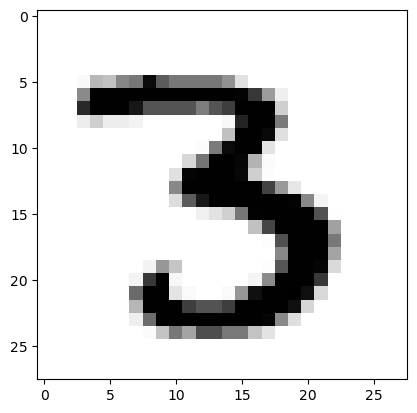

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[12], cmap='Greys')
plt.show()

In [4]:
import sys
# 이미지가 컴퓨터에 저장된값을 확인

for X in X_train[0]:
    for i in X:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [5]:
# 가로 28 * 세로 28 X_train[0]
X_train = X_train.reshape(X_train.shape[0],28*28)

In [6]:
print("변환 후 X_train.shape : ", X_train.shape)

변환 후 X_train.shape :  (60000, 784)


In [7]:
X_train.shape[1]

784

In [8]:
# 1. 이미지 데이터를 2차원으로 차원연결
# 2. 데이터 타임 확인 -> float64로 변경
# 3. 데이터를 정규화 -> 값 /255
X_train=X_train.reshape(X_train.shape[0],-1)  # 차원변경

In [9]:
print(X_train.dtype) # int -> float 로 변경
X_train = X_train.astype('float')

# 정규화
X_train=X_train/255

uint8


In [10]:
# 위과정을 한번에 실행
(X_train, y_train), (X_test,y_test) = mnist.load_data()
                       
X_train= X_train.reshape(X_train.shape[0],-1).astype('float64') /255
X_test =X_test.reshape(X_test.shape[0],-1).astype('float64') /255

In [11]:
print('class :', y_train[0] )
print(y_train.dtype) 

from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

class : 5
uint8


In [12]:
X_train.shape

(60000, 784)

In [13]:
print(X_train.reshape(-1).shape)
print(X_train.reshape(6000,-1).shape)
print(X_train.reshape(-1,28).shape)

(47040000,)
(6000, 7840)
(1680000, 28)


# 딥러닝 모델 만들기


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
X_train.shape[1]

784

In [16]:
model=Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))

early_stopping=EarlyStopping(patience=5,monitor='val_loss')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, validation_split=0.25, batch_size=200,
         verbose=0, callbacks=[early_stopping])

In [20]:
X_test.shape

(10000, 784)

In [18]:
model.history.history

{'loss': [0.3409223258495331,
  0.1453227698802948,
  0.0984099805355072,
  0.07160206884145737,
  0.053518008440732956,
  0.04093163460493088,
  0.031246766448020935,
  0.02450045384466648,
  0.01902790181338787,
  0.01468578539788723,
  0.011350814253091812,
  0.008531576953828335,
  0.006728322245180607,
  0.0053487238474190235,
  0.004017287865281105],
 'accuracy': [0.9049777984619141,
  0.9583777785301208,
  0.9726444482803345,
  0.97971111536026,
  0.9857333302497864,
  0.9895333051681519,
  0.9923555850982666,
  0.9944444298744202,
  0.9959777593612671,
  0.99717777967453,
  0.9980888962745667,
  0.9991111159324646,
  0.9992444515228271,
  0.9995555281639099,
  0.9997777938842773],
 'val_loss': [0.18690800666809082,
  0.13290753960609436,
  0.1165069192647934,
  0.10026223212480545,
  0.09718643128871918,
  0.08990852534770966,
  0.08637430518865585,
  0.08400490880012512,
  0.09004328399896622,
  0.08080042898654938,
  0.08334732055664062,
  0.08269020169973373,
  0.08482407033

In [26]:
# 모델의 정확도 측정
print('Test accuracy : ',model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9805
Test accuracy :  0.9804999828338623


In [28]:
# model=Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(10, activation='softmax'))

# early_stopping=EarlyStopping(patience=5)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=30, validation_split=0.25, batch_size=200,
#          verbose=0, callbacks=[early_stopping])

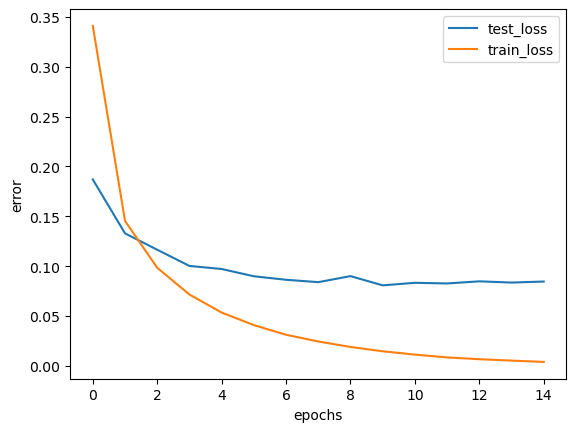

In [21]:
# 학습셋과 검증셋의 오차를 그래프로 표현
y_vloss=model.history.history['val_loss']
y_loss=model.history.history['loss']

import numpy as np
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, label='test_loss')
plt.plot(x_len, y_loss, label='train_loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('error')

plt.show()